## Calculating the Return of a Portfolio of Securities

Downloaded data for a portfolio composed of 5 stocks.  for British Petroleum, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as wb

In [2]:
tickers = ['MSFT','AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, start='2015-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2344 entries, 2015-01-02 to 2024-04-25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2344 non-null   float64
 1   AAPL    2344 non-null   float64
dtypes: float64(2)
memory usage: 54.9 KB


In [4]:
mydata.head()

,MSFT,AAPL
Date,,
2015-01-02,40.378063,24.435266
2015-01-05,40.006763,23.746885
2015-01-06,39.419567,23.749123
2015-01-07,39.920399,24.082144
2015-01-08,41.094788,25.007429


In [5]:
mydata.tail()

,MSFT,AAPL
Date,,
2024-04-19,399.119995,165.000000
2024-04-22,400.959991,165.839996
2024-04-23,407.570007,166.899994
2024-04-24,409.059998,169.020004
2024-04-25,399.040009,169.889999


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [6]:
mydata.iloc[0]

MSFT    40.378063
AAPL    24.435266
Name: 2015-01-02 00:00:00, dtype: float64

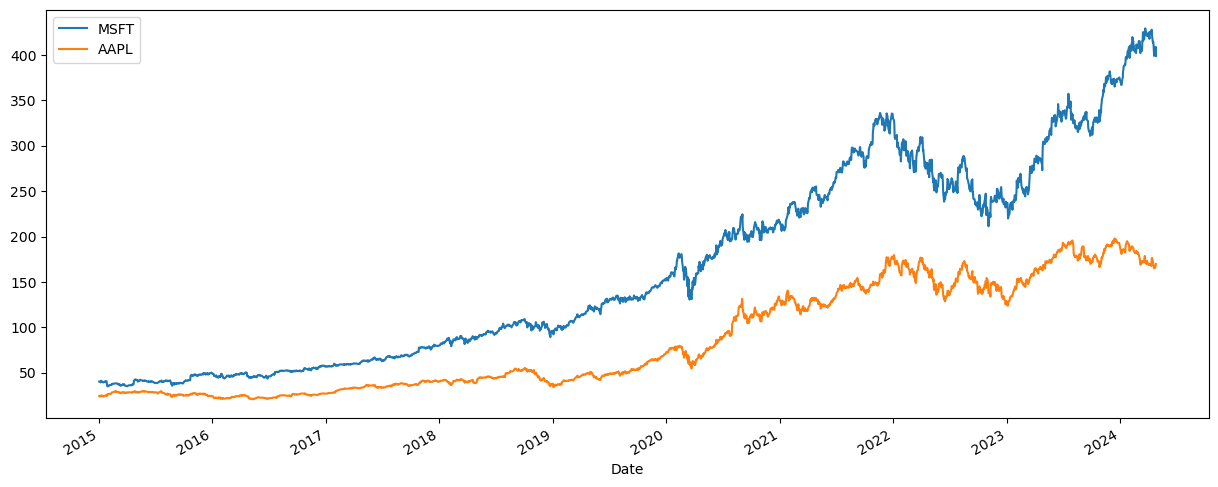

In [7]:
mydata.plot(figsize=(15,6))
plt.show()

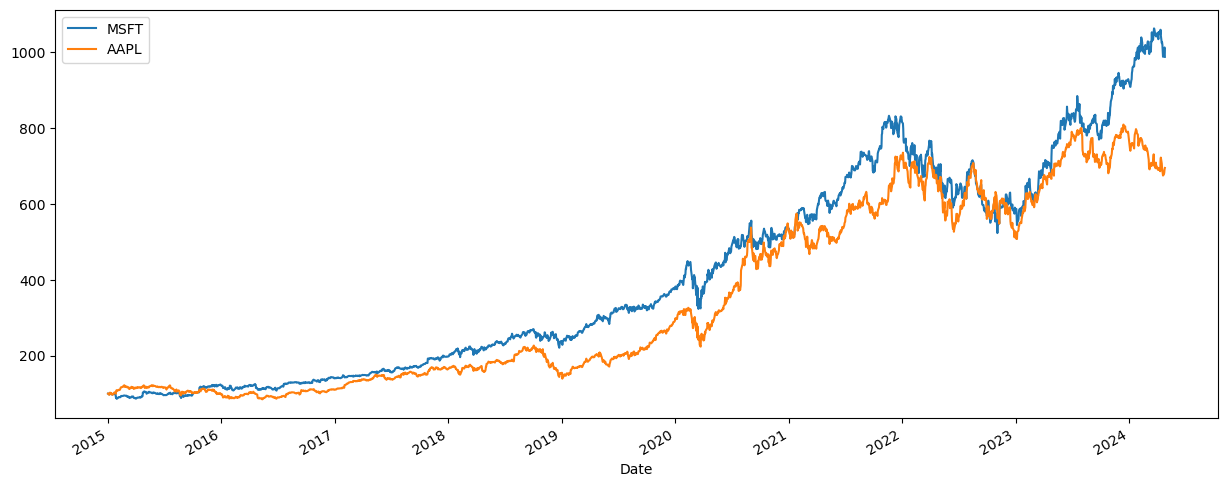

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [9]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,MSFT,AAPL
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.009196,-0.028172
2015-01-06,-0.014677,0.000094
2015-01-07,0.012705,0.014022
2015-01-08,0.029418,0.038422


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [10]:
weights = np.array([0.50, 0.50,])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [11]:
annual_returns = returns.mean() * 250
annual_returns

MSFT    0.282224
AAPL    0.248180
dtype: float64

In [12]:
np.dot(annual_returns, weights)

0.2652019067173546

Transform the result into a percentage form. 

In [13]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

26.52 %
